This block reads the dataset directory and prints the available classes :-

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

datasetpath = "../dataset"

classes = os.listdir(datasetpath)
print(f"Classes found are :- {classes}")


Classes found are :- ['clear skin', 'dark spots', 'puffy eyes', 'wrinkles']


This block loops through each class, loads one sample image, and displays it :-

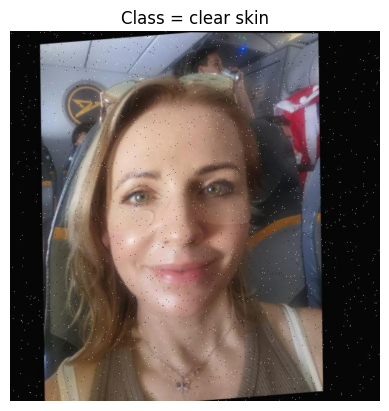

clear_skin_001.jpg from clear skin = (640, 640, 3)



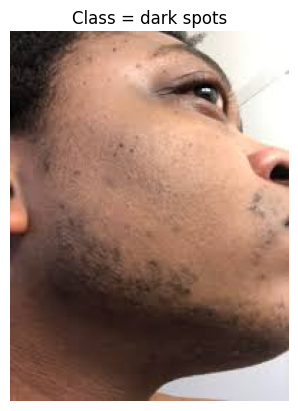

0183c6d6-8b71-4a85-a2c3-fe3fcbca3668.jpg from dark spots = (259, 195, 3)



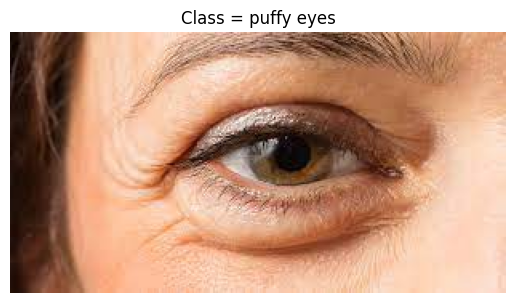

1.jpg from puffy eyes = (163, 310, 3)



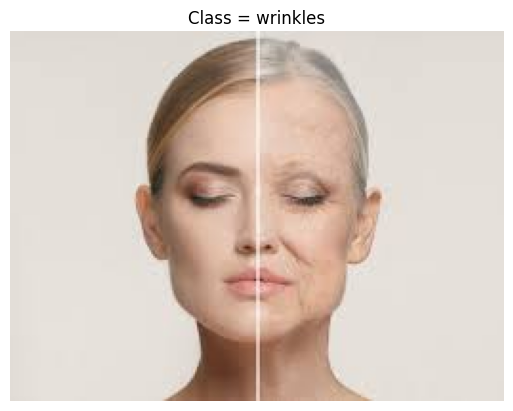

1.jpg from wrinkles = (194, 259, 3)



In [2]:
for c in classes:
    clfolder = os.path.join(datasetpath,c)
    imagename = os.listdir(clfolder)[0]
    imgagepath = os.path.join(clfolder,imagename)

    img = cv2.imread(imgagepath)
    #print(img)

    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #print(img)

    plt.Figure(figsize=(3,3))
    plt.imshow(img)
    plt.title(f"Class = {c}")
    plt.axis("off")
    plt.show()
    print(f"{imagename} from {c} = {img.shape}\n")


This block counts the images in each class and visualizes the distribution using a bar graph:

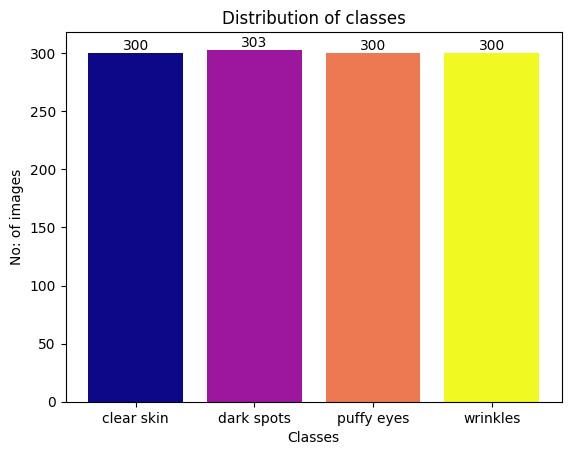

In [3]:
filecount = {}
colors = plt.cm.plasma(np.linspace(0, 1, len(classes)))

for c in classes:
    clfolder = os.path.join(datasetpath,c)
    filecount[c] = len(os.listdir(clfolder))

bargraph = plt.bar(filecount.keys(),filecount.values(),color = colors)
plt.title("Distribution of classes")
plt.xlabel("Classes")
plt.ylabel("No: of images")


for bar in bargraph:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height,str(height),ha = "center",va = "bottom")

plt.savefig("../images/plotimg.jpg",dpi = 80)
plt.show()

In [1]:
import os
splitset = "../splittedset"
trainpath = os.path.join(splitset, "train")
valpath = os.path.join(splitset, "validation")
testpath = os.path.join(splitset, "test")

This block configures data augmentation and initializes the training and validation generators:

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

splitset = "../splittedset"
trainpath = os.path.join(splitset, "train")
valpath = os.path.join(splitset, "validation")

traingenerator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode="nearest"
)

valgenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,)

trainflow = traingenerator.flow_from_directory(
    trainpath,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

valflow = valgenerator.flow_from_directory(
    valpath,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)



2025-12-18 11:47:36.394102: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-18 11:47:37.248678: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-18 11:47:40.244752: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Found 842 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


This block displays sample original validation images and their augmented training counterparts:

Original images: 


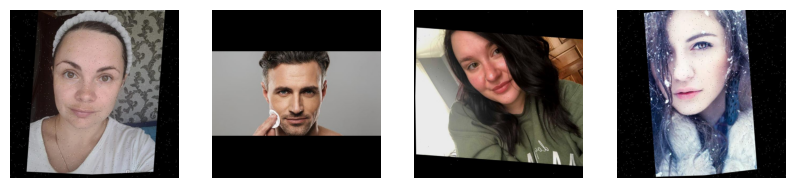

Augmented images: 


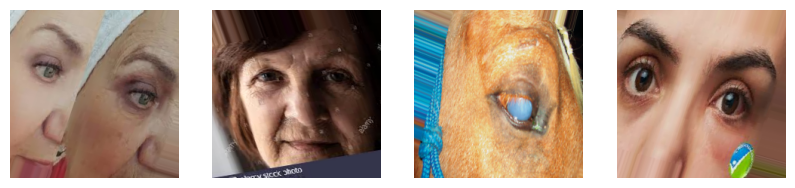

In [6]:
images, labels = next(trainflow)

trainpath = os.path.join("../splittedset", "train")

classname = os.listdir(valpath)[0]
classfolder = os.path.join(trainpath, classname)
filenames = os.listdir(classfolder)[-5:-1]

orgimages = []
for name in filenames:
    imgpath = os.path.join(classfolder, name)
    img = cv2.imread(imgpath)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    orgimages.append(img)


print("Original images: ")
plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(orgimages[i])
    plt.axis("off")
plt.savefig("../images/origimg.jpg",dpi = 80)
plt.show()


print("Augmented images: ")
plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.savefig("../images/augimg.jpg",dpi = 80)
plt.show()

This block visualizes a single augmented image and prints its one-hot encoded label:

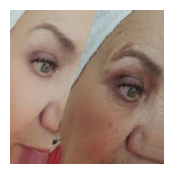

One Hot Encoding of this image :- [0. 0. 0. 1.]


In [7]:

plt.figure(figsize=(2,2))
plt.imshow(images[0])
plt.axis("off")
plt.show()

print(f"One Hot Encoding of this image :- {labels[0]}")

EFFICIENTNETB0

In [8]:
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf, numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
tf.random.set_seed(42)
np.random.seed(42)

In [9]:


traingeneratorb0 = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode="nearest"
)

valgeneratorb0 = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

trainflowb0 = traingeneratorb0.flow_from_directory(
    trainpath,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=True
)

valflowb0 = valgeneratorb0.flow_from_directory(
    valpath,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=True
)


Found 842 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [10]:

classnumb0 = len(trainflowb0.class_indices)
print("Classes:", trainflowb0.class_indices)

baseb0 = EfficientNetB0(include_top = False, weights = "imagenet", input_shape = (224,224,3))
baseb0.trainable = False

xb0 = baseb0.output
xb0 = layers.GlobalAveragePooling2D()(xb0)
xb0 = layers.BatchNormalization()(xb0)
xb0 = layers.Dropout(0.3)(xb0)
outb0 = layers.Dense(classnumb0, activation = "softmax")(xb0)
modelb0 = models.Model(inputs = baseb0.input, outputs = outb0)

modelb0.compile(
    optimizer = optimizers.Adam(1e-4),
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics = ["accuracy"]
)

print("Starting 1-epoch smoke test...")
history = modelb0.fit(trainflowb0, validation_data=valflowb0, epochs=1)
print("SMOKE TEST FINISHED")

Classes: {'clear skin': 0, 'dark spots': 1, 'puffy eyes': 2, 'wrinkles': 3}


I0000 00:00:1766038666.047140     727 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Starting 1-epoch smoke test...


2025-12-18 11:47:56.197303: I external/local_xla/xla/service/service.cc:163] XLA service 0x71c734002330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-18 11:47:56.197340: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-12-18 11:47:56.484671: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-18 11:47:58.134301: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700
2025-12-18 11:48:05.773922: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 11:48:06.112286: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay ker

41/53 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.2654 - loss: 2.0601

2025-12-18 11:48:32.606154: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[10,480,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,480,14,14]{3,2,1,0}, f32[480,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=480, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-18 11:48:32.615196: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.01431957s
Trying algorithm eng3{k11=2} for conv (f32[10,480,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,480,14,14]{3,2,1,0}, f32[480,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=480, custom_call_target="__cudnn$

53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 692ms/step - accuracy: 0.3040 - loss: 1.8833 - val_accuracy: 0.4500 - val_loss: 1.2795
SMOKE TEST FINISHED


In [11]:
from tensorflow.keras import callbacks
from sklearn.utils.class_weight import compute_class_weight
import os, numpy as np

classesb0 = sorted(trainflowb0.class_indices.keys())
countb0 = []

for c in classesb0:
    countb0.append ( len(os.listdir(os.path.join(trainpath,c))))


labelslistb0 = []

for i,c in enumerate(classesb0):
    labelslistb0 += [i] * countb0[i]


cwb0 = compute_class_weight("balanced", classes= np.unique(labelslistb0), y = np.array(labelslistb0))

classweightsb0 = {}

for i,c in enumerate(cwb0):
    classweightsb0[i] = float(c)



print("class counts:", dict(zip(classesb0, countb0)))
print("class_weight:", classweightsb0)

chckpointb0 = callbacks.ModelCheckpoint("../models/best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max")
earlystopb0 = callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
reducerateb0 = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7)

phase1b0 = modelb0.fit(
    trainflowb0,
    validation_data = valflowb0,
    epochs = 15,
    callbacks = [chckpointb0,earlystopb0,reducerateb0],
    class_weight = classweightsb0
)

print("Phase-1 training complete!")

class counts: {'clear skin': 210, 'dark spots': 212, 'puffy eyes': 210, 'wrinkles': 210}
class_weight: {0: 1.0023809523809524, 1: 0.9929245283018868, 2: 1.0023809523809524, 3: 1.0023809523809524}
Epoch 1/15
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.4038 - loss: 1.6153

53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 413ms/step - accuracy: 0.4014 - loss: 1.5991 - val_accuracy: 0.5000 - val_loss: 1.1444 - learning_rate: 1.0000e-04
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.4866 - loss: 1.4216

53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 275ms/step - accuracy: 0.5249 - loss: 1.3513 - val_accuracy: 0.6167 - val_loss: 1.0369 - learning_rate: 1.0000e-04
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.5626 - loss: 1.2600

53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.5784 - loss: 1.2389 - val_accuracy: 0.6750 - val_loss: 0.9861 - learning_rate: 1.0000e-04
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6389 - loss: 1.1162

53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - accuracy: 0.6211 - loss: 1.1308 - val_accuracy: 0.7167 - val_loss: 0.9284 - learning_rate: 1.0000e-04
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.6490 - loss: 1.1363

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 308ms/step - accuracy: 0.6520 - loss: 1.1199 - val_accuracy: 0.7500 - val_loss: 0.9018 - learning_rate: 1.0000e-04
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 222ms/step - accuracy: 0.6318 - loss: 1.1133 - val_accuracy: 0.7375 - val_loss: 0.8876 - learning_rate: 1.0000e-04
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - accuracy: 0.6473 - loss: 1.0528 - val_accuracy: 0.7375 - val_loss: 0.8736 - learning_rate: 1.0000e-04
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.6742 - loss: 1.0442

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - accuracy: 0.6686 - loss: 1.0396 - val_accuracy: 0.7625 - val_loss: 0.8705 - learning_rate: 1.0000e-04
Epoch 9/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.7051 - loss: 0.9942

53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 389ms/step - accuracy: 0.6971 - loss: 0.9972 - val_accuracy: 0.7667 - val_loss: 0.8705 - learning_rate: 1.0000e-04
Epoch 10/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.7518 - loss: 0.9117

53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 361ms/step - accuracy: 0.7067 - loss: 0.9501 - val_accuracy: 0.7750 - val_loss: 0.8632 - learning_rate: 1.0000e-04
Epoch 11/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 357ms/step - accuracy: 0.7245 - loss: 0.9459 - val_accuracy: 0.7667 - val_loss: 0.9020 - learning_rate: 1.0000e-04
Epoch 12/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - accuracy: 0.7399 - loss: 0.9074 - val_accuracy: 0.7708 - val_loss: 0.8384 - learning_rate: 1.0000e-04
Epoch 13/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 371ms/step - accuracy: 0.7328 - loss: 0.9314 - val_accuracy: 0.7750 - val_loss: 0.8467 - learning_rate: 1.0000e-04
Epoch 14/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7339 - loss: 0.9115

53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 391ms/step - accuracy: 0.7363 - loss: 0.9158 - val_accuracy: 0.7917 - val_loss: 0.8314 - learning_rate: 1.0000e-04
Epoch 15/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 399ms/step - accuracy: 0.7316 - loss: 0.8859 - val_accuracy: 0.7875 - val_loss: 0.8355 - learning_rate: 1.0000e-04
Phase-1 training complete!


In [12]:
bestepoch = np.argmax(phase1b0.history['val_accuracy'])

trainacc = phase1b0.history['accuracy'][bestepoch]
valacc = phase1b0.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 73.63420724868774
Validation Accuracy: 79.16666865348816


In [13]:
from tensorflow.keras import optimizers, callbacks

baseb0.trainable = True

Nb0 = 20

for layer in baseb0.layers[:-Nb0]:
    layer.trainable = False
for layer in baseb0.layers[-Nb0:]:
    layer.trainable = True

for layer in baseb0.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False


print("Trainable layers in base:", sum([1 for l in baseb0.layers if l.trainable]))

modelb0.compile(
    optimizer=optimizers.Adam(1e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

chckpointb0 = callbacks.ModelCheckpoint("../models/best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max")
earlystopb0   = callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
reducerateb0  = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7)
finetuneb0 = modelb0.fit(
    trainflowb0,
    validation_data=valflowb0,
    epochs=30,
    callbacks=[chckpointb0, earlystopb0, reducerateb0],
    class_weight=classweightsb0
)
print("Fine-tuning finished")



Trainable layers in base: 15
Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.7028 - loss: 0.9284

53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 586ms/step - accuracy: 0.7470 - loss: 0.8670 - val_accuracy: 0.7583 - val_loss: 0.8334 - learning_rate: 1.0000e-05
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.7609 - loss: 0.8615

53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 379ms/step - accuracy: 0.7708 - loss: 0.8335 - val_accuracy: 0.8125 - val_loss: 0.7995 - learning_rate: 1.0000e-05
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.7696 - loss: 0.8305 - val_accuracy: 0.7917 - val_loss: 0.8250 - learning_rate: 1.0000e-05
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 348ms/step - accuracy: 0.7815 - loss: 0.8319 - val_accuracy: 0.8083 - val_loss: 0.7665 - learning_rate: 1.0000e-05
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 308ms/step - accuracy: 0.7827 - loss: 0.8329 - val_accuracy: 0.8000 - val_loss: 0.7956 - learning_rate: 1.0000e-05
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 321ms/step - accuracy: 0.7969 - loss: 0.8161 - val_accuracy: 0.7875 - val_loss: 0.7844 - learning_rate: 1.0000e-05
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 353ms/step - accuracy: 0.7850 - loss: 0.8029 - val_accuracy: 0.7958 - val_loss: 0.7822 - learning_rate: 1.0000e-05
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - accuracy: 0.79

In [15]:
bestepoch = np.argmax(finetuneb0.history['val_accuracy'])

trainacc = finetuneb0.history['accuracy'][bestepoch]
valacc = finetuneb0.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 77.07838416099548
Validation Accuracy: 81.25


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np

testgenb0 = ImageDataGenerator(preprocessing_function=preprocess_input)

testflowb0 = testgenb0.flow_from_directory(
    testpath,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "categorical",
    shuffle = False
)

lossb0, accb0 = modelb0.evaluate(testflowb0)
print("Test Loss:", lossb0)
print("Test Accuracy:", accb0*(100))

predictionb0 = np.argmax(modelb0.predict(testflowb0), axis = 1)
trueb0 = testflowb0.classes
labelsb0 = list(testflowb0.class_indices.keys())


print("\nClassification Report:")
print(classification_report(trueb0, predictionb0, target_names=labelsb0))


Found 121 images belonging to 4 classes.


2025-12-18 12:01:31.236974: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[32,480,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,480,14,14]{3,2,1,0}, f32[480,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=480, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-18 12:01:31.397879: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.170588988s
Trying algorithm eng3{k11=2} for conv (f32[32,480,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,480,14,14]{3,2,1,0}, f32[480,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=480, custom_call_target="__cudnn

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8941 - loss: 0.6148

2025-12-18 12:01:42.504495: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2116', 4 bytes spill stores, 4 bytes spill loads

2025-12-18 12:01:49.452417: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:01:49.657713: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:01:49.871983: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:01:51.016486: E external/local_xla/xla/stre

4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.8264 - loss: 0.7182 
Test Loss: 0.7181861996650696
Test Accuracy: 82.64462947845459
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step 

Classification Report:
              precision    recall  f1-score   support

  clear skin       0.91      0.97      0.94        30
  dark spots       0.81      0.81      0.81        31
  puffy eyes       0.72      0.70      0.71        30
    wrinkles       0.86      0.83      0.85        30

    accuracy                           0.83       121
   macro avg       0.82      0.83      0.83       121
weighted avg       0.82      0.83      0.83       121



RESNET!

In [2]:
import os, random, numpy as np, tensorflow as tf, math, matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as resnet_preprocess
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report

2025-12-18 14:16:24.672133: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-18 14:16:25.343669: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-18 14:16:27.467376: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
os.environ['PYTHONHASHSEED'] = str(42)
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [4]:

traingenerator = ImageDataGenerator(
    preprocessing_function = resnet_preprocess,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode="nearest"
)

valgenerator = ImageDataGenerator(
    preprocessing_function = resnet_preprocess,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode="nearest"
)

trainflow = traingenerator.flow_from_directory(
    trainpath,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=True
)

valflow = valgenerator.flow_from_directory(
    valpath,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=True
)
classnum = len(trainflow.class_indices)

Found 842 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [5]:
stepsperepoch = math.ceil(trainflow.samples / trainflow.batch_size)
validationsteps = math.ceil(valflow.samples / valflow.batch_size)

In [6]:
def mixup(x, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    batch_size = x.shape[0]
    idx = np.random.permutation(batch_size)
    x2 = x[idx]
    y2 = y[idx]
    x_mix = lam * x + (1 - lam) * x2
    y_mix = lam * y + (1 - lam) * y2
    return x_mix, y_mix


def mixupgenerator(iterator, alpha=0.2):
    while True:
        x, y = next(iterator)
        x, y = mixup(x, y, alpha)
        yield x, y


mixedtraingen = mixupgenerator(trainflow, alpha=0.1)

print("MixUp generator ready. Steps/epoch:", stepsperepoch)


MixUp generator ready. Steps/epoch: 53


In [7]:
base = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
base.trainable = False

x = base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x) 
out = layers.Dense(
    classnum,
    activation='softmax',
    kernel_regularizer=regularizers.l2(1e-4)
)(x)

model = models.Model(inputs=base.input, outputs=out)


I0000 00:00:1766047589.832393   16971 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
loss = CategoricalCrossentropy()
opt = optimizers.Adam(learning_rate=1e-4)

model.compile(
    optimizer=opt,
    loss=loss,
    metrics=['accuracy']
)

print("Compiled for phase-1 training.")


Compiled for phase-1 training.


In [9]:
checkpointpath = "../models/resnet_best_model.h5"
chkp = callbacks.ModelCheckpoint(checkpointpath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)


In [10]:
historyphase1 = model.fit(
    mixedtraingen,
    steps_per_epoch=stepsperepoch,
    validation_data=valflow,
    validation_steps=validationsteps,
    epochs=15,
    callbacks=[chkp, early, reduce],
    verbose=1
)

print("Phase-1 done")


Epoch 1/15


2025-12-18 14:16:36.277317: I external/local_xla/xla/service/service.cc:163] XLA service 0x700710049970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-18 14:16:36.277409: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-12-18 14:16:36.589199: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-18 14:16:38.391208: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700


 1/53 ━━━━━━━━━━━━━━━━━━━━ 9:37 11s/step - accuracy: 0.1875 - loss: 2.0777

I0000 00:00:1766047603.782336   17119 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.2768 - loss: 2.0253
Epoch 1: val_accuracy improved from None to 0.38333, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 424ms/step - accuracy: 0.3444 - loss: 1.7800 - val_accuracy: 0.3833 - val_loss: 1.3312 - learning_rate: 1.0000e-04
Epoch 2/15
47/53 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.4738 - loss: 1.3460
Epoch 2: val_accuracy improved from 0.38333 to 0.53750, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 250ms/step - accuracy: 0.5261 - loss: 1.2521 - val_accuracy: 0.5375 - val_loss: 1.1074 - learning_rate: 1.0000e-04
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.5758 - loss: 1.1242
Epoch 3: val_accuracy improved from 0.53750 to 0.65833, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 266ms/step - accuracy: 0.5950 - loss: 1.0852 - val_accuracy: 0.6583 - val_loss: 0.9217 - learning_rate: 1.0000e-04
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.6840 - loss: 0.9546
Epoch 4: val_accuracy did not improve from 0.65833
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 277ms/step - accuracy: 0.6698 - loss: 1.0142 - val_accuracy: 0.6208 - val_loss: 0.9318 - learning_rate: 1.0000e-04
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6614 - loss: 1.0135
Epoch 5: val_accuracy improved from 0.65833 to 0.69167, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.6686 - loss: 0.9954 - val_accuracy: 0.6917 - val_loss: 0.8343 - learning_rate: 1.0000e-04
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6763 - loss: 0.9405
Epoch 6: val_accuracy improved from 0.69167 to 0.71250, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.6722 - loss: 0.9424 - val_accuracy: 0.7125 - val_loss: 0.7384 - learning_rate: 1.0000e-04
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7016 - loss: 0.9057
Epoch 7: val_accuracy did not improve from 0.71250
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.6995 - loss: 0.8928 - val_accuracy: 0.7083 - val_loss: 0.7714 - learning_rate: 1.0000e-04
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.7297 - loss: 0.7754
Epoch 8: val_accuracy improved from 0.71250 to 0.72083, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.7447 - loss: 0.7476 - val_accuracy: 0.7208 - val_loss: 0.7360 - learning_rate: 1.0000e-04
Epoch 9/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7721 - loss: 0.6293
Epoch 9: val_accuracy improved from 0.72083 to 0.72500, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.7589 - loss: 0.6981 - val_accuracy: 0.7250 - val_loss: 0.7021 - learning_rate: 1.0000e-04
Epoch 10/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7664 - loss: 0.7290
Epoch 10: val_accuracy did not improve from 0.72500
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.7518 - loss: 0.8034 - val_accuracy: 0.6875 - val_loss: 0.7287 - learning_rate: 1.0000e-04
Epoch 11/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.7135 - loss: 0.8006
Epoch 11: val_accuracy improved from 0.72500 to 0.75417, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.7470 - loss: 0.7346 - val_accuracy: 0.7542 - val_loss: 0.6547 - learning_rate: 1.0000e-04
Epoch 12/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7623 - loss: 0.7513
Epoch 12: val_accuracy did not improve from 0.75417
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.7637 - loss: 0.7475 - val_accuracy: 0.7417 - val_loss: 0.6071 - learning_rate: 1.0000e-04
Epoch 13/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.7665 - loss: 0.6427
Epoch 13: val_accuracy improved from 0.75417 to 0.77083, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.7910 - loss: 0.6246 - val_accuracy: 0.7708 - val_loss: 0.6197 - learning_rate: 1.0000e-04
Epoch 14/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7902 - loss: 0.5810
Epoch 14: val_accuracy improved from 0.77083 to 0.79167, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.7969 - loss: 0.6072 - val_accuracy: 0.7917 - val_loss: 0.5443 - learning_rate: 1.0000e-04
Epoch 15/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7805 - loss: 0.6894
Epoch 15: val_accuracy did not improve from 0.79167
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.7743 - loss: 0.7541 - val_accuracy: 0.7667 - val_loss: 0.5574 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 14.
Phase-1 done


In [11]:
bestepoch = np.argmax(historyphase1.history['val_accuracy'])

trainacc = historyphase1.history['accuracy'][bestepoch]
valacc = historyphase1.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)

Train Accuracy (best-val epoch): 79.6912133693695
Validation Accuracy: 79.16666865348816


In [12]:
learning_rates = [1e-4, 5e-5]
lr_results = {}

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")

    model = tf.keras.models.load_model(checkpointpath)

    N = 30
    for layer in model.layers[:-N]:
        layer.trainable = False
    for layer in model.layers[-N:]:
        layer.trainable = True

    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss=CategoricalCrossentropy(label_smoothing=0.1),
        metrics=["accuracy"]
    )

    history = model.fit(
        mixedtraingen,
        steps_per_epoch=stepsperepoch,
        validation_data=valflow,
        validation_steps=validationsteps,
        epochs=6,
        verbose=1
    )

    lr_results[lr] = max(history.history["val_accuracy"])
best_lr = max(lr_results, key=lr_results.get)
print("Best LR:", best_lr)


Testing learning rate: 0.0001


Epoch 1/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 411ms/step - accuracy: 0.7648 - loss: 0.9816 - val_accuracy: 0.7292 - val_loss: 0.9768
Epoch 2/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.8242 - loss: 0.8499 - val_accuracy: 0.8375 - val_loss: 0.8027
Epoch 3/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 285ms/step - accuracy: 0.8682 - loss: 0.7583 - val_accuracy: 0.8542 - val_loss: 0.7201
Epoch 4/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 348ms/step - accuracy: 0.9002 - loss: 0.7421 - val_accuracy: 0.7833 - val_loss: 0.8245
Epoch 5/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 307ms/step - accuracy: 0.9074 - loss: 0.6780 - val_accuracy: 0.8083 - val_loss: 0.8016
Epoch 6/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 320ms/step - accuracy: 0.9097 - loss: 0.6994 - val_accuracy: 0.8542 - val_loss: 0.7221

Testing learning rate: 5e-05


Epoch 1/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 545ms/step - accuracy: 0.7589 - loss: 1.0228 - val_accuracy: 0.7625 - val_loss: 0.8920
Epoch 2/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 397ms/step - accuracy: 0.8124 - loss: 0.8619 - val_accuracy: 0.8000 - val_loss: 0.8046
Epoch 3/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 391ms/step - accuracy: 0.8468 - loss: 0.7925 - val_accuracy: 0.8292 - val_loss: 0.7921
Epoch 4/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 316ms/step - accuracy: 0.8658 - loss: 0.7586 - val_accuracy: 0.8625 - val_loss: 0.7173
Epoch 5/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 340ms/step - accuracy: 0.8919 - loss: 0.7371 - val_accuracy: 0.8333 - val_loss: 0.7165
Epoch 6/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step - accuracy: 0.9169 - loss: 0.6230 - val_accuracy: 0.8708 - val_loss: 0.6769
Best LR: 5e-05


In [13]:
N = 40 
for layer in base.layers[:-N]:
    layer.trainable = False
for layer in base.layers[-N:]:
    layer.trainable = True

print("Trainable base layers:",
      sum(1 for l in base.layers if l.trainable))

finetune_loss = CategoricalCrossentropy()

finetune_opt = optimizers.Adam(best_lr)

model.compile(
    optimizer=finetune_opt,
    loss=finetune_loss,
    metrics=['accuracy']
)


history_ft = model.fit(
    mixedtraingen,
    steps_per_epoch=stepsperepoch,
    validation_data=valflow,
    validation_steps=validationsteps,
    epochs=20,
    callbacks=[chkp, early, reduce],
    verbose=1
)

print("Fine-tune done")


Trainable base layers: 40
Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.8895 - loss: 0.4147
Epoch 1: val_accuracy improved from 0.79167 to 0.85000, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 37s 521ms/step - accuracy: 0.9002 - loss: 0.3956 - val_accuracy: 0.8500 - val_loss: 0.3937 - learning_rate: 5.0000e-05
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9479 - loss: 0.2738
Epoch 2: val_accuracy improved from 0.85000 to 0.87917, saving model to ../models/resnet_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 285ms/step - accuracy: 0.9596 - loss: 0.2729 - val_accuracy: 0.8792 - val_loss: 0.4142 - learning_rate: 5.0000e-05
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9190 - loss: 0.3704
Epoch 3: val_accuracy did not improve from 0.87917
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.9228 - loss: 0.3494 - val_accuracy: 0.8667 - val_loss: 0.4317 - learning_rate: 5.0000e-05
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9242 - loss: 0.3605
Epoch 4: val_accuracy did not improve from 0.87917

Epoch 4: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 223ms/step - accuracy: 0.9418 - loss: 0.3235 - val_accuracy: 0.8625 - val_loss: 0.4079 - learning_rate: 5.0000e-05
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.9405 - loss: 0.4533
Epoch 5: val_accuracy did not improve from 0.87917
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - accuracy: 0.9442 - loss: 0.385

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 270ms/step - accuracy: 0.9394 - loss: 0.3627 - val_accuracy: 0.8833 - val_loss: 0.3729 - learning_rate: 2.5000e-05
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.9652 - loss: 0.2149
Epoch 7: val_accuracy did not improve from 0.88333
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.9644 - loss: 0.2304 - val_accuracy: 0.8583 - val_loss: 0.3886 - learning_rate: 2.5000e-05
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9720 - loss: 0.2068
Epoch 8: val_accuracy did not improve from 0.88333
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 231ms/step - accuracy: 0.9715 - loss: 0.2082 - val_accuracy: 0.8792 - val_loss: 0.3542 - learning_rate: 2.5000e-05
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9704 - loss: 0.2793
Epoch 9: val_accuracy did not improve from 0.88333
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - accuracy: 0.9656 - loss: 0.2834 - val_accuracy: 0.8750 - val_loss: 0.3630 - learning_rate: 2.5000e-05
Epoch

53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.9715 - loss: 0.2394 - val_accuracy: 0.8958 - val_loss: 0.3537 - learning_rate: 2.5000e-05
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9874 - loss: 0.2371
Epoch 12: val_accuracy did not improve from 0.89583
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.9762 - loss: 0.2826 - val_accuracy: 0.8458 - val_loss: 0.4147 - learning_rate: 2.5000e-05
Epoch 13/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9659 - loss: 0.2487
Epoch 13: val_accuracy did not improve from 0.89583
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - accuracy: 0.9632 - loss: 0.3363 - val_accuracy: 0.8958 - val_loss: 0.3550 - learning_rate: 2.5000e-05
Epoch 14/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9667 - loss: 0.2055
Epoch 14: val_accuracy did not improve from 0.89583
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.9632 - loss: 0.2395 - val_accuracy: 0.8958 - val_loss: 0.3287 - learning_rate: 2.5000e-05

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 0.9477 - loss: 0.2840 - val_accuracy: 0.9000 - val_loss: 0.3380 - learning_rate: 1.2500e-05
Epoch 19/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9835 - loss: 0.2193
Epoch 19: val_accuracy did not improve from 0.90000
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.9656 - loss: 0.2703 - val_accuracy: 0.8750 - val_loss: 0.3595 - learning_rate: 1.2500e-05
Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 14.
Fine-tune done


In [14]:
bestepoch = np.argmax(history_ft.history['val_accuracy'])

trainacc = history_ft.history['accuracy'][bestepoch]
valacc = history_ft.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 94.77434754371643
Validation Accuracy: 89.99999761581421


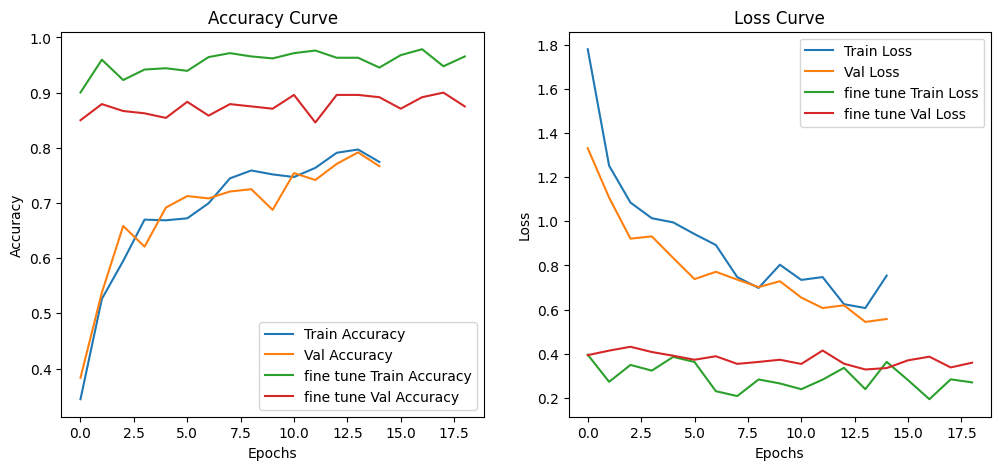

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(historyphase1.history["accuracy"], label="Train Accuracy")
plt.plot(historyphase1.history["val_accuracy"], label="Val Accuracy")
plt.plot(history_ft.history["accuracy"], label="fine tune Train Accuracy")
plt.plot(history_ft.history["val_accuracy"], label="fine tune Val Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(1,2,2)
plt.plot(historyphase1.history["loss"], label="Train Loss")
plt.plot(historyphase1.history["val_loss"], label="Val Loss")
plt.plot(history_ft.history["loss"], label="fine tune Train Loss")
plt.plot(history_ft.history["val_loss"], label="fine tune Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [16]:
testgenerator = ImageDataGenerator(
    preprocessing_function=resnet_preprocess
)

testflow = testgenerator.flow_from_directory(
    testpath,
    target_size=(224,224),
    batch_size=16,
    class_mode="categorical",
    shuffle=False
)


Found 121 images belonging to 4 classes.


In [17]:
testflow.reset()

test_steps = math.ceil(testflow.samples / testflow.batch_size)

best = tf.keras.models.load_model(checkpointpath)

loss, acc = best.evaluate(
    testflow,
    steps=test_steps,
    verbose=1
)

print(f"Test loss: {loss:.4f}  Test accuracy: {acc*100:.2f}%")

testflow.reset()
pred_probs = best.predict(
    testflow,
    steps=test_steps,
    verbose=1
)

preds = np.argmax(pred_probs, axis=1)
true = testflow.classes[:len(preds)]
labels = list(testflow.class_indices.keys())

print("\nClassification report:\n")
print(classification_report(true, preds, target_names=labels))


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 571ms/step - accuracy: 0.8926 - loss: 0.2715
Test loss: 0.2715  Test accuracy: 89.26%
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 479ms/step

Classification report:

              precision    recall  f1-score   support

  clear skin       0.91      0.97      0.94        30
  dark spots       0.81      0.97      0.88        31
  puffy eyes       1.00      0.73      0.85        30
    wrinkles       0.90      0.90      0.90        30

    accuracy                           0.89       121
   macro avg       0.90      0.89      0.89       121
weighted avg       0.90      0.89      0.89       121



EFFICIENTNETB2

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt,numpy as np


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 260
batch_size = 16

traingen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

valgen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1
)

trainflow = traingen.flow_from_directory(
    "../splittedset/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

valflow = valgen.flow_from_directory(
    "../splittedset/validation",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

testgen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

testflow = testgen.flow_from_directory(
    "../splittedset/test",
    target_size=(260, 260),
    batch_size=16,
    class_mode="categorical",
    shuffle=False
)

Found 842 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


In [4]:
base_model = EfficientNetB2(
    weights="imagenet",
    include_top=False,
    input_shape=(img_size, img_size, 3)
)

base_model.trainable = False


I0000 00:00:1766040689.522190   11610 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output = Dense(trainflow.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [6]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [7]:
checkpoint = ModelCheckpoint(
    "../models/efficientnetb2_best_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max"
)

earlystop = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,
    min_lr=1e-7
)


In [8]:
history = model.fit(
    trainflow,
    validation_data=valflow,
    epochs=20,
    callbacks=[checkpoint, earlystop, reduce_lr]
)

print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

Epoch 1/20


2025-12-18 12:21:40.669737: I external/local_xla/xla/service/service.cc:163] XLA service 0x721998002ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-18 12:21:40.669771: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-12-18 12:21:41.147407: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-18 12:21:43.626792: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700
2025-12-18 12:21:53.304843: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:21:53.659710: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay ker

21/53 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.2246 - loss: 2.0684

2025-12-18 12:22:22.669183: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:22:22.884591: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:22:23.720705: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:22:24.086666: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:22:24.333799: E external/local_xla/xla/stream_

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 712ms/step - accuracy: 0.2678 - loss: 1.9797

53/53 ━━━━━━━━━━━━━━━━━━━━ 84s 922ms/step - accuracy: 0.3207 - loss: 1.8533 - val_accuracy: 0.4417 - val_loss: 1.2596 - learning_rate: 1.0000e-04
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.3871 - loss: 1.4695

53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 323ms/step - accuracy: 0.4466 - loss: 1.4146 - val_accuracy: 0.5750 - val_loss: 1.0896 - learning_rate: 1.0000e-04
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.5364 - loss: 1.3107

53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 0.5463 - loss: 1.2223 - val_accuracy: 0.6417 - val_loss: 0.9405 - learning_rate: 1.0000e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.6211 - loss: 0.9890

53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 274ms/step - accuracy: 0.6295 - loss: 0.9619 - val_accuracy: 0.6708 - val_loss: 0.8375 - learning_rate: 1.0000e-04
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6567 - loss: 0.8817

53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 279ms/step - accuracy: 0.6449 - loss: 0.9007 - val_accuracy: 0.6917 - val_loss: 0.7836 - learning_rate: 1.0000e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.6718 - loss: 0.8693

53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 276ms/step - accuracy: 0.6865 - loss: 0.8432 - val_accuracy: 0.7250 - val_loss: 0.7324 - learning_rate: 1.0000e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.7134 - loss: 0.7609

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 291ms/step - accuracy: 0.6995 - loss: 0.7791 - val_accuracy: 0.7333 - val_loss: 0.6882 - learning_rate: 1.0000e-04
Epoch 8/20
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.6817 - loss: 0.8158

53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.7090 - loss: 0.7543 - val_accuracy: 0.7542 - val_loss: 0.6423 - learning_rate: 1.0000e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 280ms/step - accuracy: 0.7090 - loss: 0.7524 - val_accuracy: 0.7542 - val_loss: 0.6364 - learning_rate: 1.0000e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.7387 - loss: 0.6754 - val_accuracy: 0.7375 - val_loss: 0.6638 - learning_rate: 1.0000e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - accuracy: 0.7423 - loss: 0.6932 - val_accuracy: 0.7417 - val_loss: 0.6593 - learning_rate: 1.0000e-04
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 0.7340 - loss: 0.6814 - val_accuracy: 0.7417 - val_loss: 0.6192 - learning_rate: 1.0000e-04
Epoch 13/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - accuracy: 0.7553 - loss: 0.6612 - val_accuracy: 0.7542 - val_loss: 0.6397 - learning_rate: 1.0000e-04
Epoch 14/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 266ms/step - accuracy:

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.7565 - loss: 0.6605 - val_accuracy: 0.7708 - val_loss: 0.5914 - learning_rate: 1.0000e-04
Epoch 16/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 0.7672 - loss: 0.6008 - val_accuracy: 0.7667 - val_loss: 0.5777 - learning_rate: 1.0000e-04
Epoch 17/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7987 - loss: 0.5940

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 266ms/step - accuracy: 0.7862 - loss: 0.6116 - val_accuracy: 0.7833 - val_loss: 0.5652 - learning_rate: 1.0000e-04
Epoch 18/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 320ms/step - accuracy: 0.7945 - loss: 0.5562 - val_accuracy: 0.7750 - val_loss: 0.5906 - learning_rate: 1.0000e-04
Epoch 19/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.7755 - loss: 0.5859 - val_accuracy: 0.7625 - val_loss: 0.5911 - learning_rate: 1.0000e-04
Epoch 20/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 278ms/step - accuracy: 0.7625 - loss: 0.6117 - val_accuracy: 0.7625 - val_loss: 0.5694 - learning_rate: 1.0000e-04
0.7624703049659729
0.762499988079071


In [13]:
bestepoch = np.argmax(history.history['val_accuracy'])

trainacc = history.history['accuracy'][bestepoch]
valacc = history.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 78.6223292350769
Validation Accuracy: 78.33333611488342


In [14]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=5e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

fine_history = model.fit(
    trainflow,
    validation_data=valflow,
    epochs=10,
    callbacks=[checkpoint, earlystop, reduce_lr]
)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 58s 645ms/step - accuracy: 0.8100 - loss: 0.4828 - val_accuracy: 0.8042 - val_loss: 0.5254 - learning_rate: 5.0000e-05
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.8629 - loss: 0.3963

53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 322ms/step - accuracy: 0.8634 - loss: 0.4058 - val_accuracy: 0.8333 - val_loss: 0.4367 - learning_rate: 5.0000e-05
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 261ms/step - accuracy: 0.8670 - loss: 0.3416 - val_accuracy: 0.8292 - val_loss: 0.4898 - learning_rate: 5.0000e-05
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.8777 - loss: 0.3217 - val_accuracy: 0.8292 - val_loss: 0.4889 - learning_rate: 5.0000e-05
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - accuracy: 0.9014 - loss: 0.2622 - val_accuracy: 0.8292 - val_loss: 0.4489 - learning_rate: 5.0000e-05
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.8955 - loss: 0.2961 - val_accuracy: 0.8250 - val_loss: 0.4706 - learning_rate: 1.5000e-05
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9010 - loss: 0.2551

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.9062 - loss: 0.2533 - val_accuracy: 0.8542 - val_loss: 0.4095 - learning_rate: 1.5000e-05
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - accuracy: 0.8907 - loss: 0.2520 - val_accuracy: 0.8417 - val_loss: 0.4241 - learning_rate: 1.5000e-05
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 246ms/step - accuracy: 0.9252 - loss: 0.2162 - val_accuracy: 0.8333 - val_loss: 0.4454 - learning_rate: 1.5000e-05
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 271ms/step - accuracy: 0.9121 - loss: 0.2388 - val_accuracy: 0.8375 - val_loss: 0.4284 - learning_rate: 1.5000e-05


In [15]:
bestepoch = np.argmax(fine_history.history['val_accuracy'])

trainacc = fine_history.history['accuracy'][bestepoch]
valacc = fine_history.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 90.61757922172546
Validation Accuracy: 85.41666865348816


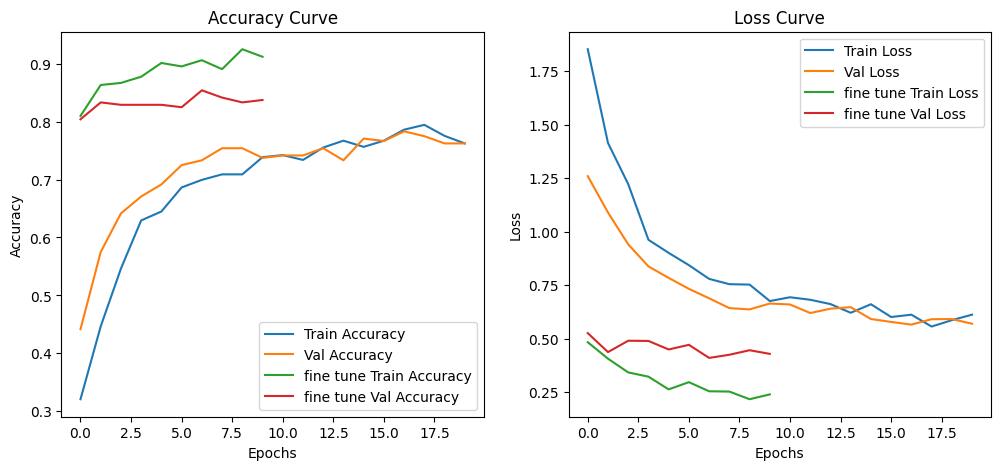

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.plot(fine_history.history["accuracy"], label="fine tune Train Accuracy")
plt.plot(fine_history.history["val_accuracy"], label="fine tune Val Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.plot(fine_history.history["loss"], label="fine tune Train Loss")
plt.plot(fine_history.history["val_loss"], label="fine tune Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [17]:

test_loss, test_accuracy = model.evaluate(testflow)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9322 - loss: 0.1631

2025-12-18 12:35:23.221129: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:35:23.460078: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:35:23.676202: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:35:23.892578: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:35:24.832379: E external/local_xla/xla/stream_

8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8843 - loss: 0.3067
Test Loss: 0.3066767454147339
Test Accuracy: 0.8842975497245789


MOBILENETV2


In [18]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as mn_preprocess
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, BatchNormalization, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np, os
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [19]:
img_size = 224
batch_size = 32
epochs_phase1 = 18
epochs_ft = 8

In [20]:
traingen_mn = ImageDataGenerator(
    preprocessing_function=mn_preprocess,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode="nearest"
)

valgen_mn = ImageDataGenerator(
    preprocessing_function=mn_preprocess,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1           
)

trainflow_mn = traingen_mn.flow_from_directory(trainpath, target_size=(img_size, img_size),
                                               batch_size=batch_size, class_mode="categorical", shuffle=True)

valflow_mn = valgen_mn.flow_from_directory(valpath, target_size=(img_size, img_size),
                                           batch_size=batch_size, class_mode="categorical", shuffle=False)

testgen_mn = ImageDataGenerator(preprocessing_function=mn_preprocess)
testflow_mn = testgen_mn.flow_from_directory(testpath, target_size=(img_size, img_size),
                                             batch_size=batch_size, class_mode="categorical", shuffle=False)

Found 842 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


In [21]:
classnum_mn = len(trainflow_mn.class_indices)
base_mn = MobileNetV2(include_top=False, weights="imagenet", input_shape=(img_size, img_size, 3))
base_mn.trainable = False

x = base_mn.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.35)(x)
out = Dense(classnum_mn, activation="softmax")(x)

model_mn = Model(inputs=base_mn.input, outputs=out)

model_mn.compile(optimizer=Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
classes_mn = sorted(trainflow_mn.class_indices.keys())
counts_mn = [len(os.listdir(os.path.join(trainpath, c))) for c in classes_mn]
labels_for_weights = []
for i, cnt in enumerate(counts_mn):
    labels_for_weights += [i] * cnt
cw_vals = compute_class_weight("balanced", classes=np.unique(labels_for_weights), y=np.array(labels_for_weights))
class_weights_mn = {i: float(w) for i, w in enumerate(cw_vals)}

print("Class counts:", dict(zip(classes_mn, counts_mn)))
print("Class weights:", class_weights_mn)

Class counts: {'clear skin': 210, 'dark spots': 212, 'puffy eyes': 210, 'wrinkles': 210}
Class weights: {0: 1.0023809523809524, 1: 0.9929245283018868, 2: 1.0023809523809524, 3: 1.0023809523809524}


In [23]:
checkpoint_mn = ModelCheckpoint("../models/mobilenetv2_best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1)
early_mn = EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=1)
reduce_mn = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7, verbose=1)

In [24]:
history_phase1_mn = model_mn.fit(
    trainflow_mn,
    validation_data=valflow_mn,
    epochs=epochs_phase1,
    callbacks=[checkpoint_mn, early_mn, reduce_mn],
    class_weight=class_weights_mn,
    verbose=1
)


print("phase1 complete.")


Epoch 1/18


2025-12-18 12:35:50.284552: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:35:50.533273: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


13/27 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.3181 - loss: 1.9948

2025-12-18 12:36:04.253963: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[10,576,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,576,14,14]{3,2,1,0}, f32[576,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=576, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-18 12:36:04.275467: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.02222902s
Trying algorithm eng3{k11=2} for conv (f32[10,576,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,576,14,14]{3,2,1,0}, f32[576,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=576, custom_call_target="__cudnn$

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.3197 - loss: 1.9633

2025-12-18 12:36:29.124277: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:36:29.347931: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.



Epoch 1: val_accuracy improved from None to 0.33750, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3290 - loss: 1.9152 - val_accuracy: 0.3375 - val_loss: 1.3524 - learning_rate: 1.0000e-04
Epoch 2/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.3680 - loss: 1.7169
Epoch 2: val_accuracy improved from 0.33750 to 0.44167, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3931 - loss: 1.6240 - val_accuracy: 0.4417 - val_loss: 1.1869 - learning_rate: 1.0000e-04
Epoch 3/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.4419 - loss: 1.4672
Epoch 3: val_accuracy improved from 0.44167 to 0.48333, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4596 - loss: 1.4343 - val_accuracy: 0.4833 - val_loss: 1.1015 - learning_rate: 1.0000e-04
Epoch 4/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.5094 - loss: 1.2515
Epoch 4: val_accuracy improved from 0.48333 to 0.59583, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5178 - loss: 1.2450 - val_accuracy: 0.5958 - val_loss: 0.9720 - learning_rate: 1.0000e-04
Epoch 5/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.5656 - loss: 1.1393
Epoch 5: val_accuracy did not improve from 0.59583
27/27 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5748 - loss: 1.1151 - val_accuracy: 0.5667 - val_loss: 0.9542 - learning_rate: 1.0000e-04
Epoch 6/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 696ms/step - accuracy: 0.6377 - loss: 1.0752
Epoch 6: val_accuracy improved from 0.59583 to 0.65000, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 942ms/step - accuracy: 0.6211 - loss: 1.0920 - val_accuracy: 0.6500 - val_loss: 0.8446 - learning_rate: 1.0000e-04
Epoch 7/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step - accuracy: 0.6315 - loss: 0.9631
Epoch 7: val_accuracy improved from 0.65000 to 0.65417, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 786ms/step - accuracy: 0.6366 - loss: 0.9687 - val_accuracy: 0.6542 - val_loss: 0.7916 - learning_rate: 1.0000e-04
Epoch 8/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.6702 - loss: 0.9202
Epoch 8: val_accuracy did not improve from 0.65417
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 541ms/step - accuracy: 0.6544 - loss: 0.9587 - val_accuracy: 0.6375 - val_loss: 0.8530 - learning_rate: 1.0000e-04
Epoch 9/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.6588 - loss: 0.8805
Epoch 9: val_accuracy improved from 0.65417 to 0.67083, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 638ms/step - accuracy: 0.6603 - loss: 0.8873 - val_accuracy: 0.6708 - val_loss: 0.7699 - learning_rate: 1.0000e-04
Epoch 10/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.6401 - loss: 0.9087
Epoch 10: val_accuracy did not improve from 0.67083
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 604ms/step - accuracy: 0.6698 - loss: 0.8688 - val_accuracy: 0.6667 - val_loss: 0.8014 - learning_rate: 1.0000e-04
Epoch 11/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.7036 - loss: 0.8365
Epoch 11: val_accuracy improved from 0.67083 to 0.72917, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 604ms/step - accuracy: 0.7162 - loss: 0.7801 - val_accuracy: 0.7292 - val_loss: 0.7035 - learning_rate: 1.0000e-04
Epoch 12/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.7008 - loss: 0.7478
Epoch 12: val_accuracy did not improve from 0.72917
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 584ms/step - accuracy: 0.7138 - loss: 0.7665 - val_accuracy: 0.7000 - val_loss: 0.7539 - learning_rate: 1.0000e-04
Epoch 13/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.7075 - loss: 0.7746
Epoch 13: val_accuracy improved from 0.72917 to 0.74167, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 608ms/step - accuracy: 0.6995 - loss: 0.7903 - val_accuracy: 0.7417 - val_loss: 0.6956 - learning_rate: 1.0000e-04
Epoch 14/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.7078 - loss: 0.7713
Epoch 14: val_accuracy did not improve from 0.74167
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 581ms/step - accuracy: 0.7257 - loss: 0.7385 - val_accuracy: 0.7125 - val_loss: 0.6975 - learning_rate: 1.0000e-04
Epoch 15/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.7453 - loss: 0.6692
Epoch 15: val_accuracy did not improve from 0.74167
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 568ms/step - accuracy: 0.7352 - loss: 0.6816 - val_accuracy: 0.7042 - val_loss: 0.7078 - learning_rate: 1.0000e-04
Epoch 16/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.7249 - loss: 0.7406
Epoch 16: val_accuracy improved from 0.74167 to 0.77083, saving model to ../models/mobilenetv2_best_model.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 485ms/step - accuracy: 0.7482 - loss: 0.6821 - val_accuracy: 0.7708 - val_loss: 0.6566 - learning_rate: 1.0000e-04
Epoch 17/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.7651 - loss: 0.6462
Epoch 17: val_accuracy did not improve from 0.77083
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 456ms/step - accuracy: 0.7470 - loss: 0.6868 - val_accuracy: 0.7333 - val_loss: 0.6740 - learning_rate: 1.0000e-04
Epoch 18/18
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.7309 - loss: 0.6988
Epoch 18: val_accuracy did not improve from 0.77083
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 409ms/step - accuracy: 0.7316 - loss: 0.6969 - val_accuracy: 0.7292 - val_loss: 0.6854 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 16.
phase1 complete.


In [25]:
bestepoch = np.argmax(history_phase1_mn.history['val_accuracy'])

trainacc = history_phase1_mn.history['accuracy'][bestepoch]
valacc = history_phase1_mn.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 74.82185363769531
Validation Accuracy: 77.08333134651184


In [ ]:
N_unfreeze = 50
for layer in base_mn.layers[:-N_unfreeze]:
    layer.trainable = False
for layer in base_mn.layers[-N_unfreeze:]:
    layer.trainable = True

print("Trainable base layers:", sum([1 for l in base_mn.layers if l.trainable]))

model_mn.compile(optimizer=Adam(1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

history_ft_mn = model_mn.fit(
    trainflow_mn,
    validation_data=valflow_mn,
    epochs=epochs_ft,
    callbacks=[checkpoint_mn, early_mn, reduce_mn],
    class_weight=class_weights_mn,
    verbose=1
)

print("fine tuning complete")
print(history_ft_mn.history['accuracy'][-1])
print(history_ft_mn.history['val_accuracy'][-1])

Trainable base layers: 50
Epoch 1/8
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.6806 - loss: 0.8660
Epoch 1: val_accuracy did not improve from 0.77083
27/27 ━━━━━━━━━━━━━━━━━━━━ 44s 990ms/step - accuracy: 0.7102 - loss: 0.7892 - val_accuracy: 0.7208 - val_loss: 0.7627 - learning_rate: 5.0000e-05
Epoch 2/8
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.8017 - loss: 0.5061
Epoch 2: val_accuracy did not improve from 0.77083
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 498ms/step - accuracy: 0.8088 - loss: 0.4953 - val_accuracy: 0.7167 - val_loss: 0.8305 - learning_rate: 5.0000e-05
Epoch 3/8
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.8680 - loss: 0.3667
Epoch 3: val_accuracy did not improve from 0.77083

Epoch 3: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 467ms/step - accuracy: 0.8575 - loss: 0.4005 - val_accuracy: 0.7417 - val_loss: 0.8319 - learning_rate: 5.0000e-05
Epoch 4/8
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step 

In [27]:
bestepoch = np.argmax(history_ft_mn.history['val_accuracy'])

trainacc = history_ft_mn.history['accuracy'][bestepoch]
valacc = history_ft_mn.history['val_accuracy'][bestepoch]

print("Train Accuracy (best-val epoch):", trainacc * 100)
print("Validation Accuracy:", valacc * 100)


Train Accuracy (best-val epoch): 90.26128053665161
Validation Accuracy: 75.83333253860474


In [28]:
loss_mn, acc_mn = model_mn.evaluate(testflow_mn, verbose=1)
print(f"Test Loss: {loss_mn:.4f}, Test Acc: {acc_mn*100:.2f}%")

testflow_mn.reset()
preds_mn = np.argmax(model_mn.predict(testflow_mn, verbose=1), axis=1)
true_mn = testflow_mn.classes[:len(preds_mn)]
labels_mn = list(testflow_mn.class_indices.keys())
print("\nClassification Report:")
print(classification_report(true_mn, preds_mn, target_names=labels_mn))


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9306 - loss: 0.2347

2025-12-18 12:44:08.628764: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1220', 4 bytes spill stores, 4 bytes spill loads

2025-12-18 12:44:15.614938: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 12:44:15.956439: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8017 - loss: 0.5260 
Test Loss: 0.5260, Test Acc: 80.17%
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step  

Classification Report:
              precision    recall  f1-score   support

  clear skin       0.91      0.97      0.94        30
  dark spots       0.71      0.97      0.82        31
  puffy eyes       0.83      0.63      0.72        30
    wrinkles       0.79      0.63      0.70        30

    accuracy                           0.80       121
   macro avg       0.81      0.80      0.79       121
weighted avg       0.81      0.80      0.79       121

